# Module 6 Exercises



Let x represent a sample collected from a normal population with unknown mean and standard deviation. We want to test if the population mean is equal to 9, at significance level alpha=0.05 .




In [4]:
x= c(6.2, 6.6, 7.1, 7.4, 7.6, 7.9, 8, 8.3, 8.4, 8.5, 8.6,
+            + 8.8, 8.8, 9.1, 9.2, 9.4, 9.4, 9.7, 9.9, 10.2, 10.4, 10.8,
+            + 11.3, 11.9)  

length(x)


[1] 24

**Activity 1:** Which statistical test should we use to find out if the population mean is equal to 9? Why? 

**Activity 2:** Write the null hypothesis and the alternate hypothesis in the cell below for the above question. 

**Activity 3:** Run the test in the following code cell for the above question. Interpret the result. Pay attention to one-tailed or two-tailed when you compute the p-value. Do you reject the null hypothesis? What does it mean? 

In [5]:
t.test(x, mu = 9, alternative = c('two.sided'), conf.level = 0.95)


	One Sample t-test

data:  x
t = -0.35687, df = 23, p-value = 0.7244
alternative hypothesis: true mean is not equal to 9
95 percent confidence interval:
 8.292017 9.499649
sample estimates:
mean of x 
 8.895833 


In [2]:
# YOUR CODE HERE 
t <- (mean(x) - 9) / (sd(x)/sqrt(24))
t

pt(abs(t), df=23, lower.tail=FALSE) * 2

critical_value = +- 2.069

[1] -0.3568722

[1] 0.7244409

**Activity 4:**  We have measured the weight of 100 individuals: 50 women (group A) and 50 men (group B). We want to know if the mean weight of women (mA) is significantly different from that of men (mB).

You will run a two-sample **t.test** to answer the question.

In [7]:
# Data in two numeric vectors
women_weight <- c(38.9, 61.2, 73.3, 21.8, 63.4, 64.6, 48.4, 48.8, 48.5)
men_weight <- c(67.8, 60, 63.4, 76, 89.4, 73.3, 67.3, 61.3, 62.4) 
# Create a data frame
my_data <- data.frame( 
                group = rep(c("Woman", "Man"), each = 9),
                weight = c(women_weight,  men_weight)
                )

my_data

group,weight
<fct>,<dbl>
Woman,38.9
Woman,61.2
Woman,73.3
Woman,21.8
Woman,63.4
Woman,64.6
Woman,48.4
Woman,48.8
Woman,48.5


**Activity 4a:** Visualize the mean and standard deviations of both groups using side by side boxplots. 

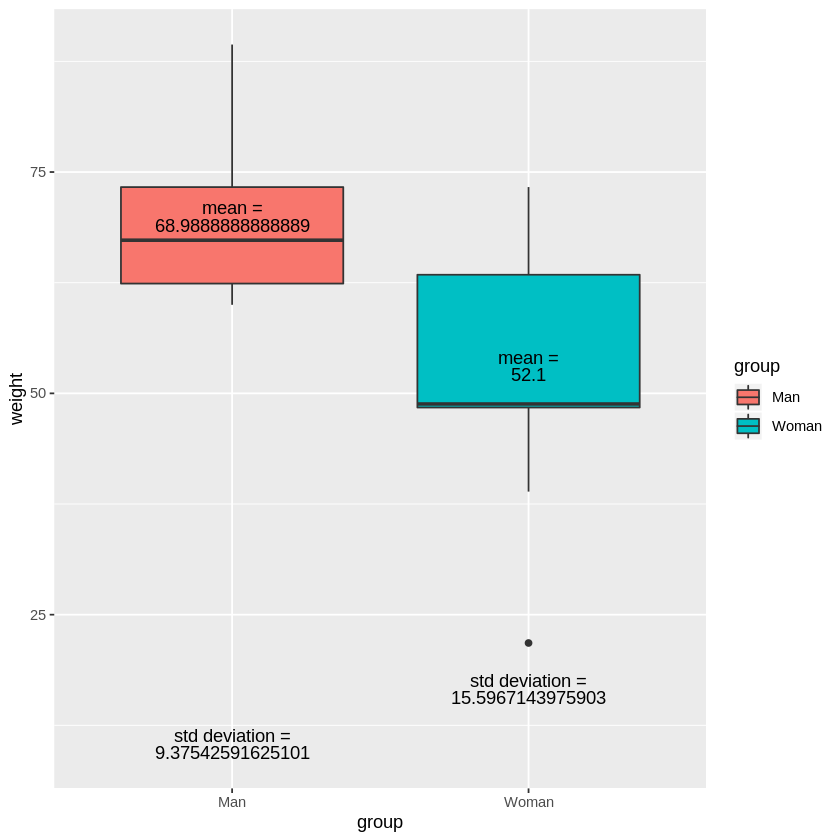

In [16]:
# YOUR CODE HERE 
library(ggplot2)
means <- aggregate(weight ~  group, my_data, mean)
sds <- aggregate(weight ~  group, my_data, sd)
ggplot(data = my_data, aes(group, y =weight, fill = group)) + geom_boxplot() + geom_text(data = means, aes(label = weight, y = weight)) + geom_text(data = sds, aes(label = weight, y = weight)) + geom_text(data = sds, aes(label = "std deviation =", y = weight + 2)) + geom_text(data = means, aes(label = "mean =", y = weight + 2)) 

**Activity 4b:** Plot a Q-Q plot for both groups to check for normality. (Alternatively, use `shapiro.test()` to check the normality if you want)

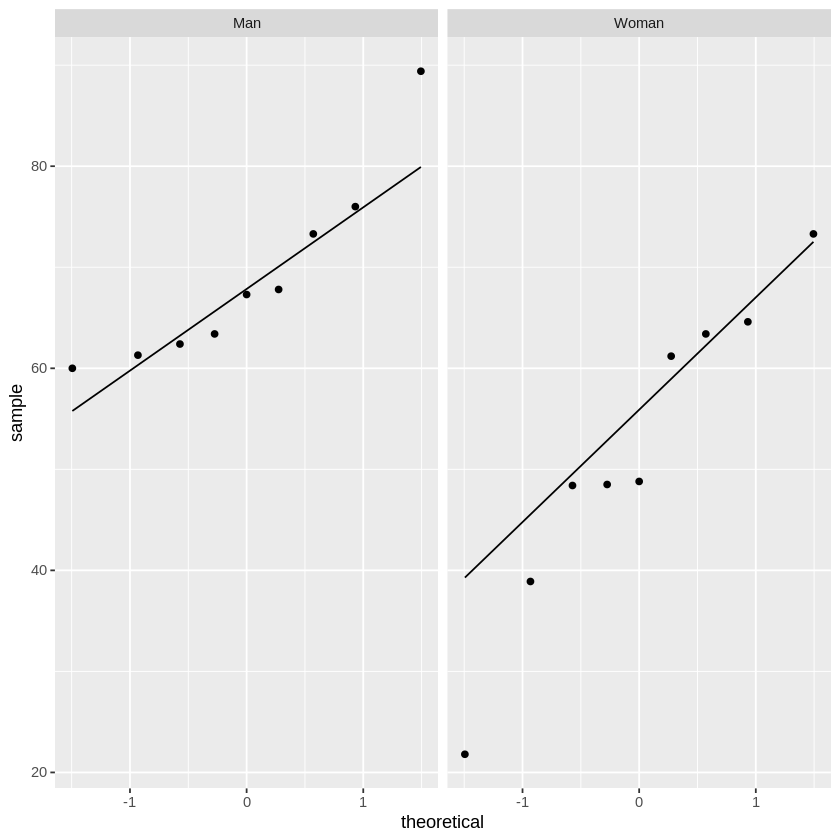

In [18]:
# YOUR CODE HERE 

p.wt <- ggplot(data = my_data, aes(sample = weight))
p.wt + stat_qq() + stat_qq_line() + facet_grid(. ~ group)


**Activity 4c:** Run your test in the below code cell, interpret the results. Does the test reject the null hypothesis? 

(You can assume that these two samples have equal variance. If you don't believe, try `var.test()` to check for that assumption.) 

In [19]:
# YOUR CODE HERE 

mydata.t.test <- t.test(weight ~ group, data = my_data)
mydata.t.test

critical_value = 2.7842
## p value 0.01538 is less than alpha (.05), so we reject the null hypothesis. The two means are not equal. Mean weight of women is statistically different 


	Welch Two Sample t-test

data:  weight by group
t = 2.7842, df = 13.114, p-value = 0.01538
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  3.795858 29.981920
sample estimates:
  mean in group Man mean in group Woman 
           68.98889            52.10000 


**Activity 5:** Suppose that the mean weight of King Penguins found in an Antarctic colony last year was 34.0 pounds. In a **sample of 35 penguins** same time this year in the same colony, the mean penguin weight is 32.2 pounds. Assume the **population** standard deviation is 5.51 pounds. At alpha=0.05 significance level, can we reject the null hypothesis that the mean penguin weight does not differ from last year?

**Activity 5a:** What ttype of statistical testing should you run to answer this question? Why? 

We will use a 1 sample z test. I chose this test because the sample size is over 30, and the mean and sd of the population are given to us. We are given 1 sample and 1 proposed mean, hence the 'one sample' z test


**Activity 5b:** Write your $H_0$ and $H_1$:

**Activity 5c:** Run your test in the below code cell, interpret the results. Does the test reject the null hypothesis? 


In [30]:
# YOUR CODE HERE 


mubar = 32.2
mu = 34

sigma = 5.51
n = 35


z = (mubar-mu)/(sigma/sqrt(n))
z



[1] -1.932658

In [25]:
##critical value 
alpha = .05 
z.alpha = qnorm(1-alpha/2)
z.alpha
## critical values are 1.95996398454005 and -1.95996398454005

qnorm(0.025)

[1] 1.959964

[1] -1.959964

In [28]:
p_val = 2* pnorm(abs(z),lower.tail = FALSE)
p_val

[1] 0.05327839

In [32]:

print('test statistic -1.93265764239189 in between critical values 1.95996398454005 and -1.95996398454005, leads us to not reject null. P value is greater than 0.05, so we fail to reject the null. If we were to reject the null, the chance of error would be too high')

[1] "test statistic -1.93265764239189 in between critical values 1.95996398454005 and -1.95996398454005, leads us to not reject null. P value is greater than 0.05, so we fail to reject the null. If we were to reject the null, the chance of error would be too high"


**Activity 6:** Imagine we have collected a random sample of 31 energy bars from a number of different stores to represent the population of energy bars available to the general consumer. The labels on the bars claim that each bar contains 20 grams of protein.

Run a statistical test at alpha=0.05 to see if the labels are correct. Your null hypothesis is $H_0: \mu=20$.

In [34]:
protein <- c(20.70,27.46,22.15,19.85,21.29,24.75,
+ 20.75,22.91,25.34,20.33,21.54,21.08,
+ 22.14,19.56,21.10,18.04,24.12,19.95,
+ 19.72,18.28,16.26,17.46,20.53,22.12,
+ 25.06,22.44,19.08,19.88,21.39,22.33,25.79)


In [35]:
meansamp = mean(protein)
meansd = sd(protein)

diff = meansamp - 20
diff
stderror = (meansd / sqrt(31))
stderror

t = diff / stderror
t

##critical value = +- 2.043

[1] 1.4

[1] 0.4564972

[1] 3.066832

In [36]:
t.test(protein, mu = 20, alternative = c('two.sided'), conf.level = 0.95)


	One Sample t-test

data:  protein
t = 3.0668, df = 30, p-value = 0.004553
alternative hypothesis: true mean is not equal to 20
95 percent confidence interval:
 20.46771 22.33229
sample estimates:
mean of x 
     21.4 


In [37]:
##3.06683163528407 > 2.043, so we reject the null that mean grams protein is 20. This means that the labels that are currently in use are likely inaccurate and that the amount of protein is greater than 20.
## p value is less than .05, so reject the null

**Activity 7:** Take a look at the `mtcars` data set. Is there an association between `cyl` and `gear` variables? Run a statistical test to answer the question. Treat these variables as **categorical**. Which test should you use? **Why?**

In [14]:
head(mtcars)
mtcars$cyl <- as.factor(mtcars$cyl)
mtcars$gear <- as.factor(mtcars$gear)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [15]:
# YOUR CODE HERE 

table(mtcars$cyl, mtcars$gear)



   
     3  4  5
  4  1  8  2
  6  2  4  1
  8 12  0  2

In [16]:
test <- chisq.test(table(mtcars$cyl, mtcars$gear))
test

Warning message in chisq.test(table(mtcars$cyl, mtcars$gear)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(mtcars$cyl, mtcars$gear)
X-squared = 18.036, df = 4, p-value = 0.001214


In [17]:
test.f <- fisher.test(table(mtcars$cyl, mtcars$gear))
test.f


	Fisher's Exact Test for Count Data

data:  table(mtcars$cyl, mtcars$gear)
p-value = 8.26e-05
alternative hypothesis: two.sided
